<a href="https://colab.research.google.com/github/Szczureczek1983/Repozytorium2/blob/main/Kopia_notatnika_Forecasting_przygotowanie_danych_i_model_plain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importy
Zaczymamy od zaimportowania potrzebnych bibliotek

In [1]:
import os
import datetime

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import keras

In [2]:
keras.__version__

'2.8.0'

## Wczytanie danych
Na początek pobobieramy i rozpakowujemy dane.

In [3]:
zip_path = tf.keras.utils.get_file(
    origin='https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip',
    fname='jena_climate_2009_2016.csv.zip',
    extract=True)
csv_path, _ = os.path.splitext(zip_path)


13582336/13568290 [==============================] - 0s 0us/step


Pobrany przez nas plik zawiera pomiary różnych parametrów pogodowych. Spórzmy na kilka pierwszysch wpisów aby wyrobić sobie intuicję.

In [8]:
df = pd.read_csv(csv_path)
df

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.30,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.40,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.90,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.20,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.10,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420546,31.12.2016 23:20:00,1000.07,-4.05,269.10,-8.13,73.10,4.52,3.30,1.22,2.06,3.30,1292.98,0.67,1.52,240.0
420547,31.12.2016 23:30:00,999.93,-3.35,269.81,-8.06,69.71,4.77,3.32,1.44,2.07,3.32,1289.44,1.14,1.92,234.3
420548,31.12.2016 23:40:00,999.82,-3.16,270.01,-8.21,67.91,4.84,3.28,1.55,2.05,3.28,1288.39,1.08,2.00,215.2
420549,31.12.2016 23:50:00,999.81,-4.23,268.94,-8.53,71.80,4.46,3.20,1.26,1.99,3.20,1293.56,1.49,2.16,225.8


In [9]:
df.describe()

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
count,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000
mean,989.212776,9.450147,283.492743,4.955854,76.008259,13.576251,9.533756,4.042412,6.022408,9.640223,1216.062748,1.702224,3.056555,174.743738
std,8.358481,8.423365,8.504471,6.730674,16.476175,7.739020,4.184164,4.896851,2.656139,4.235395,39.975208,65.446714,69.016932,86.681693
min,913.600000,-23.010000,250.600000,-25.010000,12.950000,0.950000,0.790000,0.000000,0.500000,0.800000,1059.450000,-9999.000000,-9999.000000,0.000000
25%,984.200000,3.360000,277.430000,0.240000,65.210000,7.780000,6.210000,0.870000,3.920000,6.290000,1187.490000,0.990000,1.760000,124.900000
50%,989.580000,9.420000,283.470000,5.220000,79.300000,11.820000,8.860000,2.190000,5.590000,8.960000,1213.790000,1.760000,2.960000,198.100000
75%,994.720000,15.470000,289.530000,10.070000,89.400000,17.600000,12.350000,5.300000,7.800000,12.490000,1242.770000,2.860000,4.740000,234.100000
max,1015.350000,37.280000,311.340000,23.110000,100.000000,63.770000,28.320000,46.010000,18.130000,28.820000,1393.540000,28.490000,23.500000,360.000000


Widzimy, że dane zawierają wiele parmetrów. Naszym celem będzie predykcja temperatury (T (degC)). W tym celu będziemy używać nie tylko temperatury historycznej, ale także innych zmierzonych wartości.

Dane były zbieranie z okresem 10 minut. Możemy powiedzieć że częstotliwość próbkowanania wynosi 5 razy na godzinę. W tym przypadku jest to ważne, gdyż temperatura ma charakter ciągły i pomiar odbywa się co pewien czas. W przypadku danych dyskretnych (np. sekwencja DNA, tekst) - nie mamy do czynienia z czasem pobrania próbki - po prostu mamy kolejne, następujące po sobie wartości.

Na nasze potrzeby będziemy potrzebowali danych próbkowanych co godzinę. Dlatego najpierw wybierzmy odpowiednie wiersze:


In [10]:
df = df[5::6].copy()
df

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
5,01.01.2009 01:00:00,996.50,-8.05,265.38,-8.78,94.40,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
11,01.01.2009 02:00:00,996.62,-8.88,264.54,-9.77,93.20,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
17,01.01.2009 03:00:00,996.84,-8.81,264.59,-9.66,93.50,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
23,01.01.2009 04:00:00,996.99,-9.05,264.34,-10.02,92.60,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
29,01.01.2009 05:00:00,997.46,-9.63,263.72,-10.65,92.20,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420521,31.12.2016 19:10:00,1002.18,-0.98,272.01,-5.36,72.00,5.69,4.09,1.59,2.54,4.08,1280.70,0.87,1.36,190.6
420527,31.12.2016 20:10:00,1001.40,-1.40,271.66,-6.84,66.29,5.51,3.65,1.86,2.27,3.65,1281.87,1.02,1.92,225.4
420533,31.12.2016 21:10:00,1001.19,-2.75,270.32,-6.90,72.90,4.99,3.64,1.35,2.26,3.63,1288.02,0.71,1.56,158.7
420539,31.12.2016 22:10:00,1000.65,-2.89,270.22,-7.15,72.30,4.93,3.57,1.37,2.22,3.57,1288.03,0.35,0.68,216.7


## EDA i preprocessing
Przyjrzyjmy sie rozkładowi danych:

In [14]:
df.describe()

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
count,70091.000000,70091.000000,70091.000000,70091.000000,70091.000000,70091.000000,70091.000000,70091.000000,70091.000000,70091.000000,70091.000000,70091.000000,70091.000000,70091.000000
mean,989.212842,9.450482,283.493086,4.956471,76.009788,13.576576,9.533968,4.042536,6.022560,9.640437,1216.061232,2.130539,3.533671,174.789095
std,8.358886,8.423384,8.504424,6.730081,16.474920,7.739883,4.183658,4.898549,2.655812,4.234862,39.974263,1.543098,2.343417,86.619431
min,913.600000,-22.760000,250.850000,-24.800000,13.880000,0.970000,0.810000,0.000000,0.510000,0.810000,1059.450000,0.000000,0.000000,0.000000
25%,984.200000,3.350000,277.440000,0.240000,65.210000,7.770000,6.220000,0.870000,3.920000,6.290000,1187.470000,0.990000,1.760000,125.300000
50%,989.570000,9.410000,283.460000,5.210000,79.300000,11.820000,8.860000,2.190000,5.590000,8.960000,1213.800000,1.760000,2.980000,198.100000
75%,994.720000,15.480000,289.530000,10.080000,89.400000,17.610000,12.360000,5.300000,7.800000,12.490000,1242.765000,2.860000,4.740000,234.000000
max,1015.290000,37.280000,311.210000,23.060000,100.000000,63.770000,28.250000,46.010000,18.070000,28.740000,1393.540000,14.010000,23.500000,360.000000


### Pytanie
Czy wiesz dlaczego wiatr jest podany w dwóch kolumnach? (wd (deg) oraz wv (m/s)). Pytanie może być bardzo trudnie jeżeli nigdy nie miałeś_aś styczności z takimi danymi.

### Pytanie
W jaki inny sposób możemy opisać dane nt. siły i kierunku wiatru? Jaki jest problem z obecną reprezentacją?

## Poprawianie outlierów. 

Wartość -9999 jest najprawdopodbniej błędna. Zamieńmy ją na zero.

### Pytanie
Dlaczego nie chcemy po prostu usunąć tych rekordów?

In [12]:
# proszę zamienić wszystkie rekordy poniżej 0 dla kolumny 'wv (m/s)' i 'max. wv (m/s)' na wartość 0

wv = df['wv (m/s)']
bad_wv = wv == -9999.0
wv[bad_wv] = 0.0

max_wv = df['max. wv (m/s)']
bad_max_wv = max_wv == -9999.0
max_wv[bad_max_wv] = 0.0

# The above inplace edits are reflected in the DataFrame.
df['wv (m/s)'].min()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


0.0

In [13]:
df[['wv (m/s)', 'max. wv (m/s)']].describe()

,wv (m/s),max. wv (m/s)
count,70091.000000,70091.000000
mean,2.130539,3.533671
std,1.543098,2.343417
min,0.000000,0.000000
25%,0.990000,1.760000
50%,1.760000,2.980000
75%,2.860000,4.740000
max,14.010000,23.500000


Wiemy już, że azymut nie jest dobrą cechą. Najprościej będzie się jej pozbyć. Przy okazji usuńmy kolumnę ze stemplem czasowym. Nie będziemy go używać w modelu.

In [17]:
# proszę usunąć kolumny 'wd (deg)' i 'Date Time' z naszej ramki danych
df = df.drop(columns=['wd (deg)', 'Date Time'])
df

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s)
5,996.50,-8.05,265.38,-8.78,94.40,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63
11,996.62,-8.88,264.54,-9.77,93.20,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63
17,996.84,-8.81,264.59,-9.66,93.50,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63
23,996.99,-9.05,264.34,-10.02,92.60,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38
29,997.46,-9.63,263.72,-10.65,92.20,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...
420521,1002.18,-0.98,272.01,-5.36,72.00,5.69,4.09,1.59,2.54,4.08,1280.70,0.87,1.36
420527,1001.40,-1.40,271.66,-6.84,66.29,5.51,3.65,1.86,2.27,3.65,1281.87,1.02,1.92
420533,1001.19,-2.75,270.32,-6.90,72.90,4.99,3.64,1.35,2.26,3.63,1288.02,0.71,1.56
420539,1000.65,-2.89,270.22,-7.15,72.30,4.93,3.57,1.37,2.22,3.57,1288.03,0.35,0.68


## Pytanie - Fearture engineering

Powyższe kolumny mogłby nie zostać usunięte ale jakoś zamienione/przetransformowane - czy macie pomysł jak?

### Dla chętnych
Przeprowadzić Feature Engineering i spróbować poniższego modelu na rozszerzonych danych. Można skorzystać z pomysłów podanych pod tym linkiem: https://www.tensorflow.org/tutorials/structured_data/time_series

# Podział na zbiory treningowy/walidacyjny i testowy

Podzielmy dane na zbiory train/val/test. Zwykle podziału dokonujemy losowo, tym razem jest inaczej. Pierwsze 70% trafi do zbiory treningowego, kolejne 15% do walidacyjnego a ostatne 15% do testowego. Zapewni to bardziej wiarygodną ewaluację - model testujemy na danych późniejszych niż treningowe. Dodatkowo w ten sposób będziemy mieli zapewnioną spójność wygenerowanych okien - o co chodzi dowiesz się wkrótce ;)

In [22]:
column_indices = {name: i for i, name in enumerate(df.columns)}

# proszę zwrócić uwagę, że nie możemy użyć train_test_split gdyż potasowałby dane
# a my musimy zachować kolejność naszych pomiarów
dset_len = len(df)
df_train = df.iloc[0:int(dset_len*0.7)]
df_val = df.iloc[int(dset_len*0.7):int(dset_len*0.85)]
df_test = df.iloc[int(dset_len*0.85):]

num_features = df.shape[1]
len(df_train), len(df_val), len(df_test)

(49063, 10514, 10514)

## Normalizacja/standaryzacja

Sieć neuronowa potrzebuje danych numerycznych w standardowej postaci. Tzn, średnia każdej cechy powinna wynosić zero a jej odchylenie standardowe jeden. Dobra wiadomość jest taka, że dowolne dane możemy przekształcić do takiej formy przy użyciu wzoru:
$$ z= \frac{x-μ}{σ}$$

UWAGA, średnią i odchylenie obliczamy ze zbioru treningowego! To bardzo ważne, inaczej mamy wyciek ze zbiorów val/test.

In [23]:
# proszę wykonać standaryzację (ręcznie lub przez sklearn)
train_mean = df_train.mean()
train_std = df_train.std()

df_train = (df_train - train_mean) / train_std
df_val = (df_val - train_mean) / train_std
df_test = (df_test - train_mean) / train_std

In [24]:
df_train.describe().round(3)

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s)
count,49063.000,49063.000,49063.000,49063.000,49063.000,49063.000,49063.000,49063.000,49063.000,49063.000,49063.000,49063.000,49063.000
mean,0.000,-0.000,0.000,0.000,-0.000,-0.000,-0.000,-0.000,-0.000,0.000,-0.000,0.000,-0.000
std,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
min,-9.046,-3.682,-3.707,-4.217,-3.747,-1.610,-2.031,-0.830,-2.023,-2.032,-3.847,-1.404,-1.535
25%,-0.609,-0.707,-0.694,-0.670,-0.658,-0.751,-0.779,-0.658,-0.776,-0.776,-0.712,-0.739,-0.760
50%,0.055,0.009,0.013,0.052,0.199,-0.223,-0.156,-0.384,-0.155,-0.154,-0.078,-0.231,-0.225
75%,0.655,0.720,0.712,0.753,0.815,0.533,0.668,0.268,0.665,0.665,0.644,0.479,0.521
max,2.913,3.067,3.041,2.648,1.455,5.846,4.490,7.842,4.551,4.524,4.310,7.725,8.594


In [21]:
df_val.describe().round(3)

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s)
count,10514.000,10514.000,10514.000,10514.000,10514.000,10514.000,10514.000,10514.000,10514.000,10514.000,10514.000,10514.000,10514.000
mean,0.185,0.213,0.198,0.243,-0.023,0.178,0.225,0.087,0.221,0.221,-0.163,-0.052,-0.036
std,0.951,0.896,0.903,0.873,1.023,1.043,1.003,1.102,1.005,1.004,0.903,1.002,1.028
min,-5.184,-2.013,-2.034,-2.246,-3.034,-1.312,-1.601,-0.830,-1.600,-1.602,-2.764,-1.404,-1.535
25%,-0.338,-0.521,-0.540,-0.516,-0.728,-0.632,-0.662,-0.622,-0.668,-0.666,-0.797,-0.785,-0.794
50%,0.190,0.252,0.233,0.301,0.181,0.006,0.112,-0.328,0.109,0.111,-0.216,-0.316,-0.311
75%,0.802,0.819,0.807,0.934,0.827,0.661,0.923,0.396,0.920,0.919,0.532,0.408,0.478
max,3.044,3.255,3.211,2.177,1.455,6.552,3.266,8.720,3.312,3.297,2.213,6.448,6.512


Przyjrzyjmy sie jak rozład wygląda teraz:

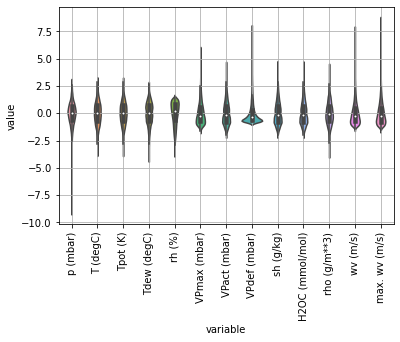

In [25]:
ax = sns.violinplot(x='variable', y='value', data=df_train.melt())
ax.grid()
_ = ax.set_xticklabels(df_train.keys(), rotation=90)

To samo dla zbioru walidacyjnego

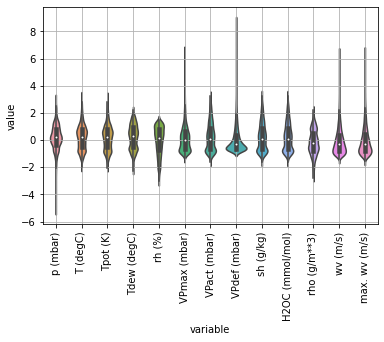

In [26]:
ax = sns.violinplot(x='variable', y='value', data=df_val.melt())
ax.grid()
_ = ax.set_xticklabels(df_val.keys(), rotation=90)

## Zapisanie zbiorów

Mamy gotowe dane, teraz wystarczy je zapisać.

In [27]:
df_train.to_csv('temp_train.csv')
df_val.to_csv('temp_val.csv')
df_test.to_csv('temp_test.csv')


# Przygotowamie danych do użycia w modelu

Nadal nie wiemy jak zakodować dane tak aby użyć ich w modelu. To za chwilę się zmiemi ;) 

In [29]:
# kod pochodzi z https://www.tensorflow.org/tutorials/structured_data/time_series

class WindowGenerator():
    """
    Generator posłuży nam do generowania tzw okien na których bedziemy pracować. 
    Okien tzn fragmentów sekwencji które trafią do modelu
    """
    def __init__(self, input_width, label_width, shift,
                 train_df=df_train, val_df=df_val, test_df=df_test,
                 label_columns=None):
        """
        input_width - ile elementów ma liczyć sekwencja wejściowa?
        label_width - ile elementów ma liczyć sekwencja wyjściowa? 
                      innymi słowy - czy przewidujemy jedną czy więcej
                      wartości na wyjściu?
        shift - o ile output ma być przesunięty względem inputu? Np czy przewidujemy temperaturę za godzinę czy za 24h
        """
        # Store the raw data.
        self.train_df = train_df
        self.val_df = val_df
        self.test_df = test_df
        # Work out the label column indices.
        self.label_columns = label_columns
        if label_columns is not None:
            self.label_columns_indices = {name: i for i, name in
                                        enumerate(label_columns)}
        self.column_indices = {name: i for i, name in
                               enumerate(train_df.columns)}
        # Work out the window parameters.
        self.input_width = input_width
        self.label_width = label_width
        self.shift = shift
        self.total_window_size = input_width + shift
        self.input_slice = slice(0, input_width)
        self.input_indices = np.arange(self.total_window_size)[self.input_slice]
        self.label_start = self.total_window_size - self.label_width
        self.labels_slice = slice(self.label_start, None)
        self.label_indices = np.arange(self.total_window_size)[self.labels_slice]
        
    def __repr__(self):
        return '\n'.join([
            f'Total window size: {self.total_window_size}',
            f'Input indices: {self.input_indices}',
            f'Label indices: {self.label_indices}',
            f'Label column name(s): {self.label_columns}'])

In [30]:
def split_window(self, features):
    inputs = features[:, self.input_slice, :]
    labels = features[:, self.labels_slice, :]
    if self.label_columns is not None:
        labels = tf.stack(
            [labels[:, :, self.column_indices[name]] for name in self.label_columns],
            axis=-1)
    # Slicing doesn't preserve static shape information, so set the shapes
    # manually. This way the `tf.data.Datasets` are easier to inspect.
    inputs.set_shape([None, self.input_width, None])
    labels.set_shape([None, self.label_width, None])
    return inputs, labels

WindowGenerator.split_window = split_window

In [31]:
def plot(self, model=None, plot_col='T (degC)', max_subplots=3):
    inputs, labels = self.example
    plt.figure(figsize=(12, 8))
    plot_col_index = self.column_indices[plot_col]
    max_n = min(max_subplots, len(inputs))
    for n in range(max_n):
        plt.subplot(max_n, 1, n+1)
        plt.ylabel(f'{plot_col} [normed]')
        plt.plot(self.input_indices, inputs[n, :, plot_col_index],
                 label='Inputs', marker='.', zorder=-10)
        if self.label_columns:
            label_col_index = self.label_columns_indices.get(plot_col, None)
        else:
            label_col_index = plot_col_index
        if label_col_index is None:
            continue
        plt.scatter(self.label_indices, labels[n, :, label_col_index],
                    edgecolors='k', label='Labels', c='#2ca02c', s=64)
        if model is not None:
            predictions = model(inputs)
            if len(predictions.shape) == 2:
                predictions = tf.expand_dims(predictions,1)
            plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                        marker='X', edgecolors='k', label='Predictions',
                        c='#ff7f0e', s=64)
        if n == 0:
            plt.legend()
    plt.xlabel('Time [h]')

WindowGenerator.plot = plot

In [32]:
def make_dataset(self, data):
    data = np.array(data, dtype=np.float32)
    ds = tf.keras.utils.timeseries_dataset_from_array(
        data=data,
        targets=None,
        sequence_length=self.total_window_size,
        sequence_stride=1,
        shuffle=True,
        batch_size=32,)
    ds = ds.map(self.split_window)
    return ds

WindowGenerator.make_dataset = make_dataset

In [33]:
@property
def train(self):
    return self.make_dataset(self.train_df)

@property
def val(self):
    return self.make_dataset(self.val_df)

@property
def test(self):
    return self.make_dataset(self.test_df)

@property
def example(self):
    """Get and cache an example batch of `inputs, labels` for plotting."""
    result = getattr(self, '_example', None)
    if result is None:
        # No example batch was found, so get one from the `.train` dataset
        result = next(iter(self.train))
        # And cache it for next time
        self._example = result
    return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

Total window size: 13
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11]
Label indices: [12]
Label column name(s): ['T (degC)']


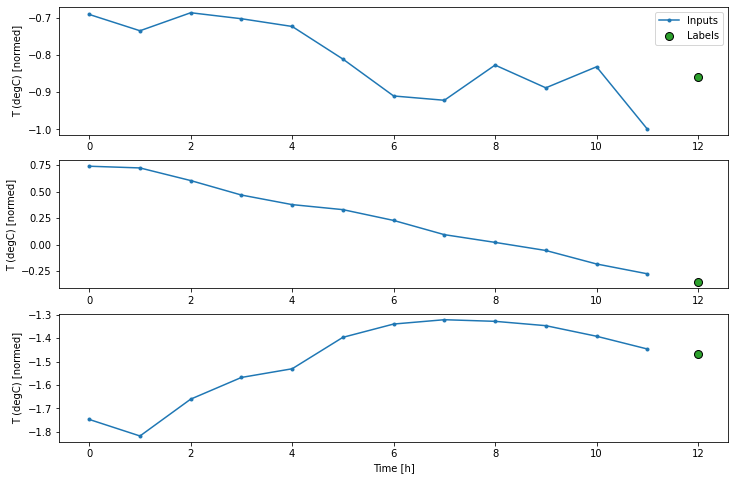

In [55]:
# przykładowe okno - predykcja jednej wartości temperaturny na podstawie ostatnich 12h
next_in_12_h = WindowGenerator(input_width=12, label_width=1, shift=1, label_columns=['T (degC)'])
print(next_in_12_h)
next_in_12_h.plot()

Total window size: 48
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [47]
Label column name(s): ['T (degC)']


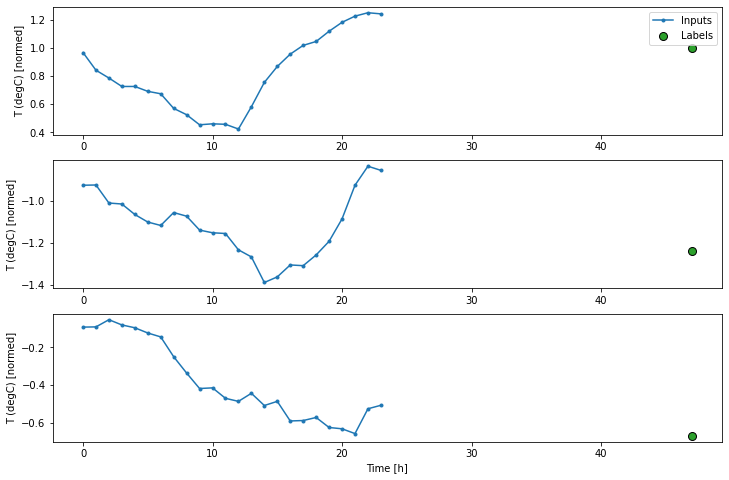

In [58]:
# przykładowe okno - predykcja jednej wartości temperaturny za 24h na podstawie ostatnich 24h
lookahead_24h = WindowGenerator(input_width=24, label_width=1, shift=24, label_columns=['T (degC)'])
print(lookahead_24h)
lookahead_24h.plot()

Total window size: 72
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
Label indices: [48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71]
Label column name(s): ['T (degC)']


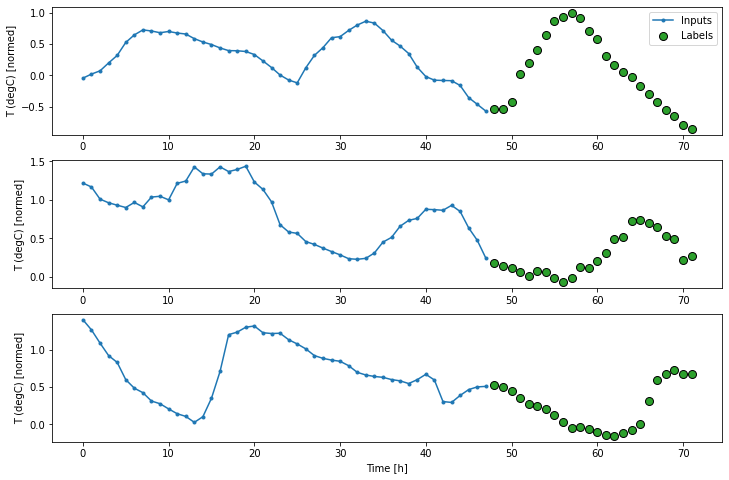

In [66]:
# przykładowe okno - predykcja następnych 24h wartości temperaturny na podstawie ostatnich 48h
continous_24h = WindowGenerator(input_width=48, label_width=24, shift=24, label_columns=['T (degC)'])
print(continous_24h)
continous_24h.plot()

## Pytanie

Jaki baseline możemy wymyślić?

In [67]:
single_step_window = WindowGenerator(
    input_width=1, label_width=1, shift=1,
    label_columns=['T (degC)'])
single_step_window

Total window size: 2
Input indices: [0]
Label indices: [1]
Label column name(s): ['T (degC)']

In [68]:
class Baseline(tf.keras.Model):
  def __init__(self, label_index=None):
    super().__init__()
    self.label_index = label_index

  def call(self, inputs):
    if self.label_index is None:
      return inputs
    result = inputs[:, :, self.label_index]
    return result[:, :, tf.newaxis]

In [69]:
# baseline - prosty (naiwny) model predykujący, że za godzinę będzie dokładnie 
# taka sama temperatura, jaka jest akutalnie
baseline = Baseline(label_index=column_indices['T (degC)'])

baseline.compile(loss=tf.keras.losses.MeanSquaredError(),
                 metrics=[tf.keras.metrics.MeanAbsoluteError()])

val_performance = {}
performance = {}
val_performance['Baseline'] = baseline.evaluate(single_step_window.val)
performance['Baseline'] = baseline.evaluate(single_step_window.test, verbose=0)

329/329 [==============================] - 2s 3ms/step - loss: 0.0143 - mean_absolute_error: 0.0834


In [70]:
wide_window = WindowGenerator(
    input_width=24, label_width=24, shift=1,
    label_columns=['T (degC)'])

wide_window

Total window size: 25
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]
Label column name(s): ['T (degC)']

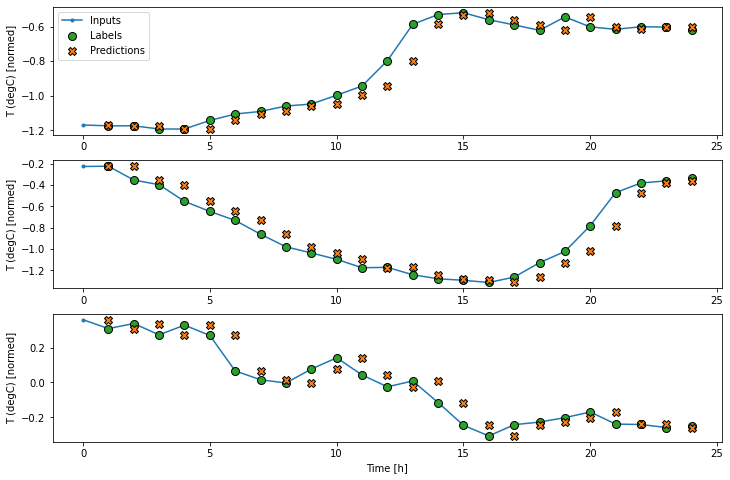

In [75]:
wide_window.plot(baseline)

# Modelowanie

In [76]:
from tensorflow import keras
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras.losses import MeanAbsoluteError, MeanSquaredError
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

Możemy wykorzystać zarówno mse jak i mae - oba nadają się do regresji. MAE będzie przykładał mniejszą wagę do dużych błędów. To które wybieramy zależy od tego na czym nam zależy

$ mse = (y - \hat{y})^2 $


$ mae = |y - \hat{y}| $


Total window size: 13
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11]
Label indices: [12]
Label column name(s): ['T (degC)']


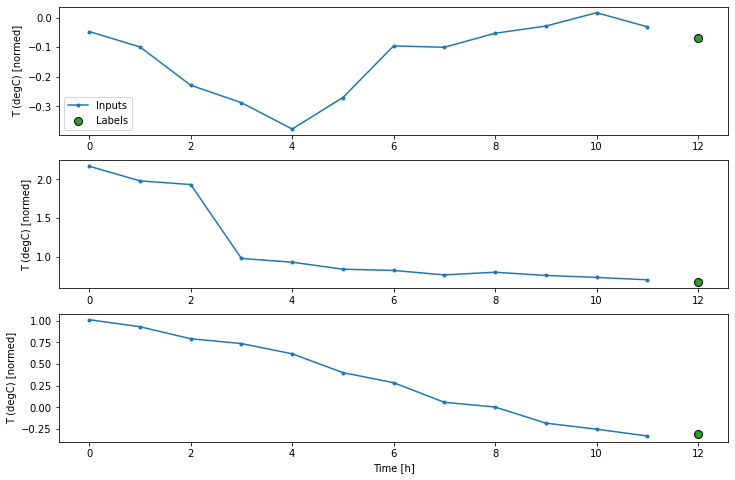

In [77]:
next_in_12_h = WindowGenerator(input_width=12, label_width=1, shift=1, label_columns=['T (degC)'])
print(next_in_12_h)
next_in_12_h.plot()

In [79]:
# PROSZĘ UZUPEŁNIĆ KOD
rnn_model = keras.models.Sequential()
# proszę dodać następujące warstwy sieci:
# - warstwę SimpleRNN z 32 komórkami (tym razem proszę tutaj nie podawać kształtu wejścia)
# - warstwę gęstą z liczbą odpowiadającą wyjściu
rnn_model.add(SimpleRNN(32))
rnn_model.add(Dense(1, activation='linear'))
rnn_model.build(input_shape=[None, 12, 13 ])


# proszę wykorzystać metodę `build` i w niej podać odpowiedni kształt wejścia
# - pierwszy wymiar odpowiada batchowi ale proszę go ustawić na dowolną wielkość batcha
# - drugi odpowiada liczbie kroków w czasie
# - trzeci odpowiada liczbie cech zawartych w każdym kroku w czasie


rnn_model.summary()



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 32)                1472      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,505
Trainable params: 1,505
Non-trainable params: 0
_________________________________________________________________


In [80]:
# proszę określić funkcję kosztu najczęściej używaną w zadaniu regresji
criterion = MeanSquaredError()
# zainicjalizować optimizer Adam
optim = Adam()

#skompilować model 'rnn_model' z optimizerem, funkcją straty oraz metrykami do monitorowania: MAE i MSE
rnn_model.compile(optimizer=optim, loss = criterion, metrics = ['mae', 'mse'])

# proszę wytrenować model podając odpowiedni generator danych przez 7 epok, również podać odpowiedni generator danych dla walidacji podczas treningu
history = rnn_model.fit(next_in_12_h.train, epochs = 7, validation_data= next_in_12_h.val)

Epoch 1/7
1533/1533 [==============================] - 24s 14ms/step - loss: 0.0262 - mae: 0.1002 - mse: 0.0262 - val_loss: 0.0101 - val_mae: 0.0712 - val_mse: 0.0101
Epoch 2/7
1533/1533 [==============================] - 24s 15ms/step - loss: 0.0093 - mae: 0.0686 - mse: 0.0093 - val_loss: 0.0110 - val_mae: 0.0772 - val_mse: 0.0110
Epoch 3/7
1533/1533 [==============================] - 21s 14ms/step - loss: 0.0088 - mae: 0.0660 - mse: 0.0088 - val_loss: 0.0089 - val_mae: 0.0656 - val_mse: 0.0089
Epoch 4/7
1533/1533 [==============================] - 22s 14ms/step - loss: 0.0086 - mae: 0.0653 - mse: 0.0086 - val_loss: 0.0086 - val_mae: 0.0640 - val_mse: 0.0086
Epoch 5/7
1533/1533 [==============================] - 23s 15ms/step - loss: 0.0082 - mae: 0.0637 - mse: 0.0082 - val_loss: 0.0087 - val_mae: 0.0658 - val_mse: 0.0087
Epoch 6/7
1533/1533 [==============================] - 22s 14ms/step - loss: 0.0081 - mae: 0.0632 - mse: 0.0081 - val_loss: 0.0081 - val_mae: 0.0617 - val_mse: 0.008

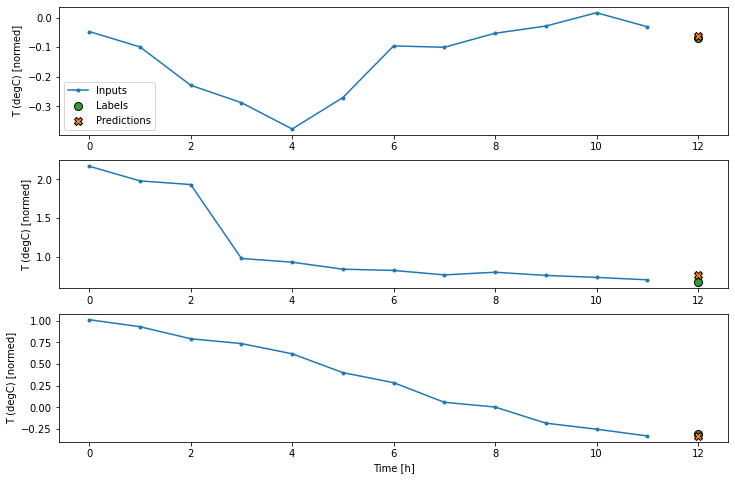

In [81]:
next_in_12_h.plot(rnn_model)

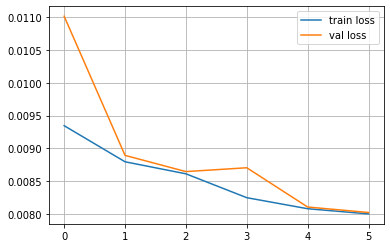

In [83]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(train_loss[1:], label='train loss')
plt.plot(val_loss[1:], label='val loss')
plt.legend()
plt.grid()

In [84]:
# możemy też "zapakować" powyższy model w klasę aby łatwiej obsługiwać w przyszłości
class TemperatureModel(keras.Model): # definiujemy model przez subclassing
    def __init__(self, rnn_hidden_size): # hidden size przekazujemy jako parametr modelu
        # ofc równie dobrze możemy zahardcodować (i tak generalnie robimy w trakcie kursu)
        # żeby oszczędzić trochę czasu na pisaniu 
        super().__init__(self)
        self.rnn = SimpleRNN(rnn_hidden_size) # prosta sieć rnn
        self.fc = Dense(1) # jeden neuron na wyjściu (przewidujemy jedną wartość).
        # bez aktywacji ponieważ robimy regresję!
        
    def call(self, inputs, training=False):
        x = inputs
        x = self.rnn(x, training=training)
        x = self.fc(x, training=training)
        return x


tm = TemperatureModel(32) # model rnn o wielkości 32
tm.build(input_shape=[None, 12, 13]) # input batch size x szerokość okna wejściowego (czly seq len - to to samo) x 13 features]

tm.summary()


criterion = MeanSquaredError() # MSE
optim = Adam()

tm.compile(optimizer=optim, loss=criterion, metrics=['mae', 'mse']) # do raportowania spojrzymy też na mae

history = tm.fit(next_in_12_h.train, epochs=3, validation_data=next_in_12_h.val)

Model: "temperature_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_2 (SimpleRNN)    multiple                  1472      
                                                                 
 dense_2 (Dense)             multiple                  33        
                                                                 
Total params: 1,505
Trainable params: 1,505
Non-trainable params: 0
_________________________________________________________________
Epoch 1/3
1533/1533 [==============================] - 22s 14ms/step - loss: 0.0209 - mae: 0.0914 - mse: 0.0209 - val_loss: 0.0101 - val_mae: 0.0718 - val_mse: 0.0101
Epoch 2/3
1533/1533 [==============================] - 23s 15ms/step - loss: 0.0092 - mae: 0.0679 - mse: 0.0092 - val_loss: 0.0089 - val_mae: 0.0661 - val_mse: 0.0089
Epoch 3/3
1533/1533 [==============================] - 22s 14ms/step - loss: 0.0087 - mae: 0.0659 - mse: 0.00

In [85]:
val_performance['TM'] = tm.evaluate(next_in_12_h.val)
performance['TM'] = tm.evaluate(next_in_12_h.test, verbose=0)

329/329 [==============================] - 2s 5ms/step - loss: 0.0085 - mae: 0.0640 - mse: 0.0085


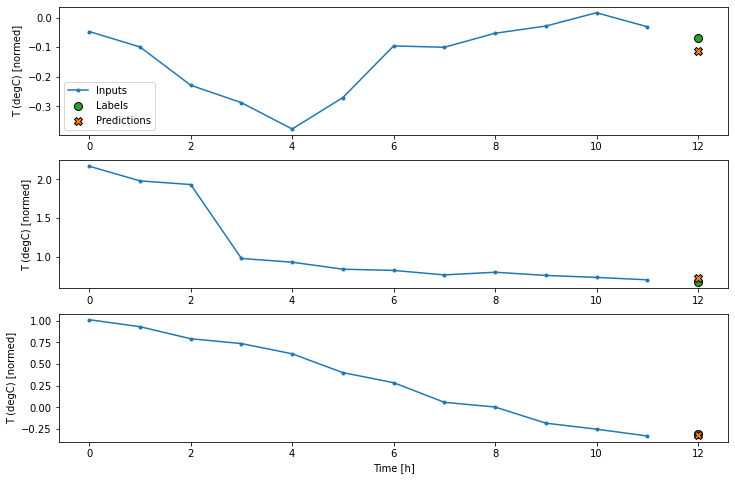

In [86]:
next_in_12_h.plot(tm)